# Downoad the [data](https://www.kaggle.com/competitions/rsna-2024-lumbar-spine-degenerative-classification/data) from Kaggle:




In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sgautam3","key":"c678e06d3351821a7a83a9dcd9bda9b3"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle competitions download -c rsna-2024-lumbar-spine-degenerative-classification

100% 28.2G/28.2G [05:48<00:00, 125MB/s] 
100% 28.2G/28.2G [05:48<00:00, 87.0MB/s]


In [ ]:
!unzip rsna-2024-lumbar-spine-degenerative-classification.zip -d /content/data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/train_images/885894528/2509467535/43.dcm  
  inflating: /content/data/train_images/885894528/2509467535/44.dcm  
  inflating: /content/data/train_images/885894528/2509467535/45.dcm  
  inflating: /content/data/train_images/885894528/2509467535/46.dcm  
  inflating: /content/data/train_images/885894528/2509467535/47.dcm  
  inflating: /content/data/train_images/885894528/2509467535/48.dcm  
  inflating: /content/data/train_images/885894528/2509467535/49.dcm  
  inflating: /content/data/train_images/885894528/2509467535/5.dcm  
  inflating: /content/data/train_images/885894528/2509467535/50.dcm  
  inflating: /content/data/train_images/885894528/2509467535/6.dcm  
  inflating: /content/data/train_images/885894528/2509467535/7.dcm  
  inflating: /content/data/train_images/885894528/2509467535/8.dcm  
  inflating: /content/data/train_images/885894528/2509467535/9.dcm  
  inflating: /content/data/train_images/8858

In [ ]:
!rm /content/rsna-2024-lumbar-spine-degenerative-classification.zip

# Data Visualisation

In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.7 MB/s eta 0:00:00


In [ ]:
import pydicom
import matplotlib.pyplot as plt

In [ ]:
# visualise the 'dcm' file that from train_images
file_path = '/content/data/train_images/100206310/1012284084/1.dcm'
ds = pydicom.dcmread(file_path)
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

In [ ]:
train = pd.read_csv('/content/data/train.csv')

In [ ]:
len(train) # number of studies

Total Cases:  1975


In [ ]:
train.columns

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

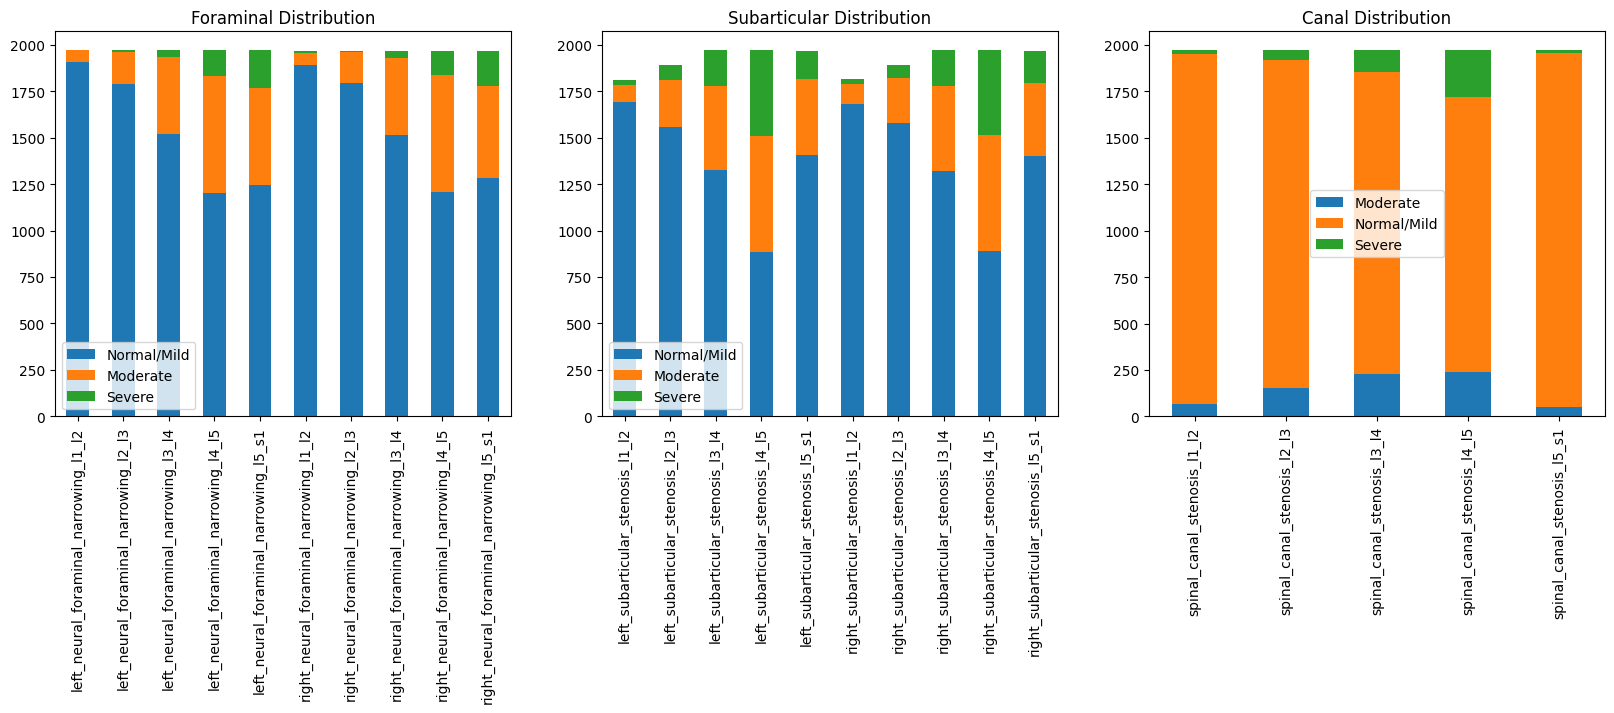

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Set up a figure with 3 side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Define the three categories we want to look at
categories = ['foraminal', 'subarticular', 'canal']

# Go through each category one by one
for i in range(3):  # Loop from 0 to 2
    category = categories[i]  # Get the current category

    # Find all columns in 'train' that contain the category name
    columns = [col for col in train.columns if category in col]

    # Select only those columns from our data
    data_subset = train[columns]

    # Count the values (like 0s and 1s) in each column
    counts = data_subset.apply(pd.Series.value_counts).fillna(0).T

    # Plot the counts as a stacked bar chart in the appropriate subplot
    counts.plot(kind='bar', stacked=True, ax=axes[i])

    # Give the plot a title
    axes[i].set_title(f'{category.capitalize()} Distribution')

# Step 9: Show the plot on the screen
plt.show()


# Extract subset of the data



Extract the AxialT2 series_id form train_series_descriptions.csv

In [ ]:
import pandas as pd

# Load the CSV file
train_df = pd.read_csv('/content/train_series_descriptions.csv')

# Filter the DataFrame to keep only rows where 'SeriesDescription' is 'Axial T2'
axial_t2_df = train_df[train_df['series_description'] == 'Axial T2']

# Save the filtered DataFrame to a new CSV file
axial_t2_df.to_csv('/content/train_series_descriptions_AxialT2.csv', index=False)

extract only the canal_stenosis images

In [ ]:
train_df = pd.read_csv('/content/train.csv')

# keeping columns starting with "left_subarticular_stenosis" or "right_subarticular_stenosis"
selected_columns = [col for col in train_df.columns if col.startswith('left_subarticular_stenosis') or col.startswith('right_subarticular_stenosis') or col.startswith('study_id')]
new_df = train_df[selected_columns]

# Save the new DataFrame to a CSV file
new_df.to_csv('train_AxialT2.csv', index=False)

Clean the data and drop empty entries.



In [ ]:
train_df = pd.read_csv('train_AxialT2.csv')

# Drop rows with any empty cells
train_df.dropna(inplace=True)

# Save the modified DataFrame back to the CSV file
train_df.to_csv('train_AxialT2_filter.csv', index=False)

Merge the 2 csv to bring all the relevant information in one csv and get label for each 'series_id'.

In [ ]:
train_axial_t2 = pd.read_csv('train_AxialT2_filter.csv')
train_series_descriptions = pd.read_csv('train_series_descriptions_AxialT2.csv')

# Merge the two DataFrames based on 'study_id'
merged_df = pd.merge(train_axial_t2, train_series_descriptions[['study_id', 'series_id']], on='study_id', how='left')

# Reorder columns to place 'series_id' immediately after 'study_id'
cols = list(merged_df.columns)
study_id_index = cols.index('study_id')
cols.insert(study_id_index + 1, cols.pop(cols.index('series_id')))
merged_df = merged_df[cols]

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('AxialT2_data.csv', index=False)

In [ ]:
# Load the CSV files
axial_t2_data = pd.read_csv('AxialT2_data.csv')
train_labels = pd.read_csv('train_label_Left_Subarticular_L4_L5.csv')

# Extract the relevant column from axial_t2_data
left_subarticular_stenosis = axial_t2_data['left_subarticular_stenosis_l4_l5']

# Merge the two dataframes on 'series_id'
merged_df = pd.merge(train_labels, axial_t2_data[['series_id', 'left_subarticular_stenosis_l4_l5']], on='series_id', how='left')

# Fill the 'severity' column in train_labels based on the merged data
train_labels['severity'] = merged_df['left_subarticular_stenosis_l4_l5']

# Save the updated train_labels DataFrame
train_labels.to_csv('train_label_AxialT2_Data.csv', index=False)

Check for any empty entries.

In [ ]:
# Load the CSV file
train_label_AxialT2_Data = pd.read_csv('train_label_AxialT2_Data.csv')

# Delete rows where 'severity' is empty
train_label_AxialT2_Data = train_label_AxialT2_Data.dropna(subset=['severity'])

# Save the modified DataFrame to a new CSV file
train_label_AxialT2_Data.to_csv('AxialT2_labels_left_l4_5.csv', index=False)

Finally we have a csv file that has all the labeld relaent data (AxialT2 images for canal_stenosis and level l4_5 with the labeled severity)

# Data Preprocessing

Now we need to extract the our relavant data from the dataset and segregate them in their respective folders/classes (Normal,Moderate,Severe) with the help of 'AxialT2_labels_left_l4_5.csv' that we created above.

In [ ]:
# Create the main directory and subdirectories
base_dir = '/content/AxialT2_left_l4_5_data_roi'
os.makedirs(base_dir, exist_ok=True)
subdirs = ['Normal', 'Moderate', 'Severe']
for subdir in subdirs:
    os.makedirs(os.path.join(base_dir, subdir), exist_ok=True)


Here we extract the ROI(region of intrest) from the whole image, resize it (to size 112) and save in the respective directory (Normal, Moderate or Severe).

We extracted ROI size the relevnt changes are only in a small area of the whole image, thus to improve the accuracy and make the job of classifier easy we extracted ROI

In [ ]:
import pandas as pd
import os
import shutil
from PIL import Image
import pydicom
import cv2
import numpy as np

# Load the CSV file containing image labels and severities
labels_df = pd.read_csv('AxialT2_labels_left_l4_5.csv')

# Define the source and destination directories
source_dir = '/content/data/train_images'
destination_dir = '/content/AxialT2_left_l4_5_data_roi_112'

# Iterate through each row in the labels DataFrame
for index, row in labels_df.iterrows():
    study_id = str(int(row['study_id']))
    series_id = str(int(row['series_id']))
    instance_number = str(int(row['instance_number']))
    severity = row['severity']
    x = int(row['x'])
    y = int(row['y'])

    # Construct the source file path
    image_path = os.path.join(source_dir, study_id, series_id, instance_number + '.dcm')

    # Determine the destination subdirectory based on severity
    if severity == 'Normal/Mild':
        destination_subdir = 'Normal'
    else:
        destination_subdir = severity

    # Construct the destination file path
    destination_path = os.path.join(destination_dir, destination_subdir, series_id +"_"+ instance_number + '.png')

    # Create the destination subdirectory if it doesn't exist
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)

    # Copy the image file to the destination directory, handling potential errors
    try:
        if os.path.exists(image_path):
            # Load the DICOM file
            ds = pydicom.dcmread(image_path)

            # Extract the pixel array
            pixel_array = ds.pixel_array

            # Normalize the pixel array to 8-bit (0-255)
            normalized_array = (pixel_array - pixel_array.min()) / (pixel_array.max() - pixel_array.min())
            scaled_array = (normalized_array * 255).astype(np.uint8)

             # Convert the pixel array to a grayscale image
            image = cv2.cvtColor(scaled_array, cv2.COLOR_GRAY2BGR)

            # # Mark a dot on the image
            # cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)

            # Define the ROI coordinates
            h, w = image.shape[:2]
            h = int((h * 0.25)/2)
            w = int((w * 0.25)/2)

            # Crop the ROI
            roi = image[y-h:y+h, x-w:x+w]
            resized_roi = cv2.resize(roi, (112, 112), interpolation=cv2.INTER_AREA)

            # Ensure the output directory exists
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)

            # Write the PNG file
            # cv2.imwrite(destination_path, image)
            cv2.imwrite(destination_path, resized_roi)

        else:
            print(f"Image file not found: {image_path}")
    except (shutil.SameFileError, OSError) as e:
        print(f"Error copying file {image_path}: {e}")

In [ ]:
!zip -r /content/AxialT2_left_l4_5_data_roi_112.zip /content/AxialT2_left_l4_5_data_roi_112

  adding: content/AxialT2_left_l4_5_data_roi_224/ (stored 0%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/ (stored 0%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/2773479263_19.png (deflated 26%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/6539474_29.png (deflated 17%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/1501150117_9.png (deflated 17%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/1280331258_13.png (deflated 18%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/2034399927_32.png (deflated 30%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/3356302344_24.png (deflated 17%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/3394685819_32.png (deflated 26%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/1835512018_15.png (deflated 19%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Moderate/4121293796_36.png (deflated 17%)
  adding: content/AxialT2_left_l4_5_data_roi_224/Mod

# Train classifier models and compare:

In [1]:
!unzip /content/AxialT2_left_l4_5_data_roi_112_clean.zip

Archive:  /content/AxialT2_left_l4_5_data_roi_112_clean.zip
   creating: AxialT2_left_l4_5_data_roi_112_clean/
   creating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/2773479263_19.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/6539474_29.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/1501150117_9.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/1280331258_13.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/2034399927_32.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/3356302344_24.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/3394685819_32.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/1835512018_15.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/4121293796_36.png  
  inflating: AxialT2_left_l4_5_data_roi_112_clean/Moderate/2863294497_27.png  
  inflating: AxialT2_left_l4_5_data_roi_112

## Binary Classification (Normal and Severe)



###Classification using CNN:

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

Found 926 images belonging to 2 classes.
Found 230 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.6570 - loss: 0.5940 - val_accuracy: 0.8130 - val_loss: 0.4169
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.7850 - loss: 0.4868 - val_accuracy: 0.8435 - val_loss: 0.3701
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.7544 - loss: 0.4898 - val_accuracy: 0.7957 - val_loss: 0.4180
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.8378 - loss: 0.4326 - val_accuracy: 0.8652 - val_loss: 0.3581
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.8356 - loss: 0.3810 - val_accuracy: 0.8565 - val_loss: 0.3698
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8195 - loss: 0.4036 - val_accuracy: 0.8739 - val_loss: 0.3133
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8542 - loss: 0.3494 - val_accuracy: 0.8522 - val_loss: 0.3544
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.8605 - loss: 0.3642 - val_accuracy: 0.8696 - val

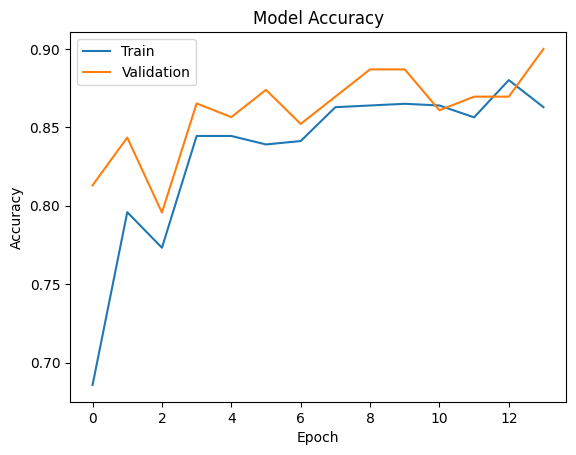

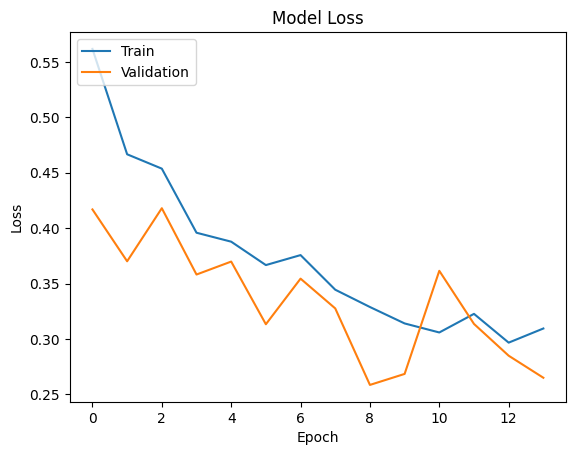

In [ ]:
# Define image dimensions and batch size
img_height, img_width = 112, 112
batch_size = 32

# Define data directories
data_dir = "/content/AxialT2_left_l4_5_data_roi_112_clean"
train_dir = os.path.join(data_dir)
val_dir = os.path.join(data_dir)


# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set validation split
)

# Rescale validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Use binary for two classes
    subset='training',
    classes=['Normal','Severe']
)

# Create validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    classes=['Normal','Severe']
)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping] # Add early stopping callback
)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


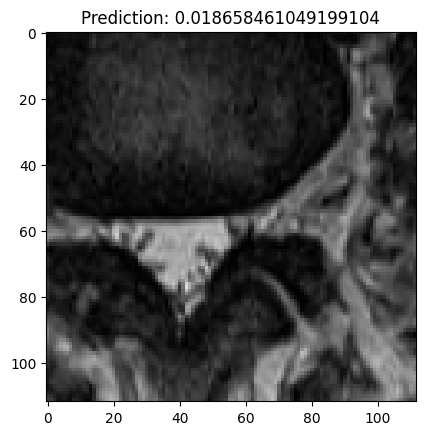

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

# Assuming your model is named 'model' and is already trained
# If not, load your trained model here:
# model = keras.models.load_model("your_model_path.h5")

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
    img = cv2.resize(img, (112, 112))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_on_image(image_path, model):
  img = preprocess_image(image_path)
  prediction = model.predict(img)
  return prediction

# Example usage
# image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Normal/1014921752_16.png" # Replace with the actual path of your image
# image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Severe/1012284084_46.png" # Replace with the actual path of your image
image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Normal/1014921752_16.png"

prediction = predict_on_image(image_path, model)


# Display the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Prediction: {prediction[0][0]}") # Assuming binary classification
plt.show()

In [ ]:
# Save the CNN model
model.save('/content/CNN.h5')

### Classification using SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from PIL import Image

# Load your image data and labels
# Assuming you have a function to load images and labels
def load_data(data_dir):
    images = []
    labels = []
    for class_name in ['Normal', 'Severe']:  # Replace with your class names
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.png'):  # Adjust if your image format is different
                img_path = os.path.join(class_dir, filename)
                try:
                    img = Image.open(img_path)
                    img = img.resize((112, 112)) # Resize to match your model input
                    img_array = np.array(img).flatten() # Flatten the image
                    images.append(img_array)
                    labels.append(1 if class_name == 'Severe' else 0) # Convert to numerical label
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)

X, y = load_data('/content/AxialT2_left_l4_5_data_roi_112_clean')


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1) # You can adjust the kernel and C parameter
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9439655172413793
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       159
           1       0.89      0.93      0.91        73

    accuracy                           0.94       232
   macro avg       0.93      0.94      0.94       232
weighted avg       0.94      0.94      0.94       232



In [ ]:
def predict_svm_single_image(image_path, model, X):
    """Predicts the class of a single image using the trained SVM model.

    Args:
        image_path (str): The path to the image file.
        model (SVC): The trained SVM model.
        X (np.array): Array of flattened images used for training the SVM. This is needed
                     to determine the shape for preprocessing the input image.

    Returns:
        int: The predicted class label (0 or 1).
    """

    try:
      img = Image.open(image_path)
      img = img.resize((112, 112))  # Resize to match your model input
      img_array = np.array(img).flatten()  # Flatten the image
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

    # Reshape the input image to match the shape of data used in training.
    # Important: Ensure that the input image has the same dimensionality
    # as the images used to train the SVM
    img_array = img_array.reshape(1, -1) # Reshape for single image prediction

    prediction = model.predict(img_array)
    return prediction[0]


# Example usage:
# image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Normal/1017047203_18.png"  # Replace with the actual image path
image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Severe/1012284084_46.png"
predicted_class = predict_svm_single_image(image_path, svm_model, X)

if predicted_class is not None:
    print(f"Predicted class for {image_path}: {predicted_class}")

Predicted class for /content/AxialT2_left_l4_5_data_roi_112_clean/Severe/1012284084_46.png: 1


In [ ]:
# Save the SVM model
import joblib
joblib.dump(svm_model, '/content/SVM.pkl')

['/content/drive/MyDrive/my_svm_model.pkl']

## Multi Class Classifier (Normal, Moderate and Severe)

Found 1370 images belonging to 3 classes.
Found 340 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.4160 - loss: 1.0645 - val_accuracy: 0.4941 - val_loss: 0.9555
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - accuracy: 0.5141 - loss: 0.9535 - val_accuracy: 0.6147 - val_loss: 0.8487
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.5514 - loss: 0.9159 - val_accuracy: 0.6529 - val_loss: 0.8036
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.5860 - loss: 0.8710 - val_accuracy: 0.6412 - val_loss: 0.8063
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.6098 - loss: 0.8545 - val_accuracy: 0.6588 - val_loss: 0.7944
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.5978 - loss: 0.8259 - val_accuracy: 0.6559 - val_loss: 0.7627
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.5902 - loss: 0.8137 - val_accuracy: 0.6235 - val_loss: 0.7923
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.6077 - loss: 0.7997 - val_accura

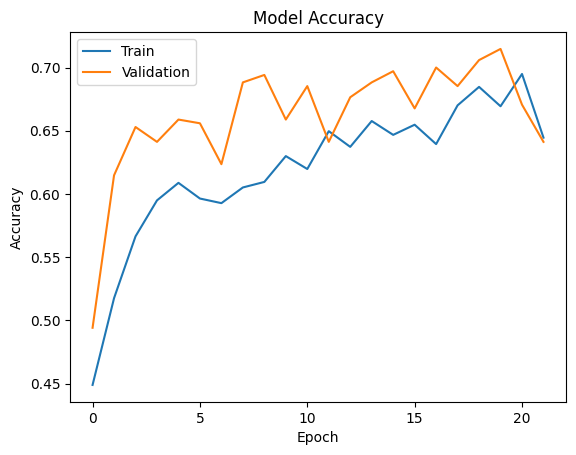

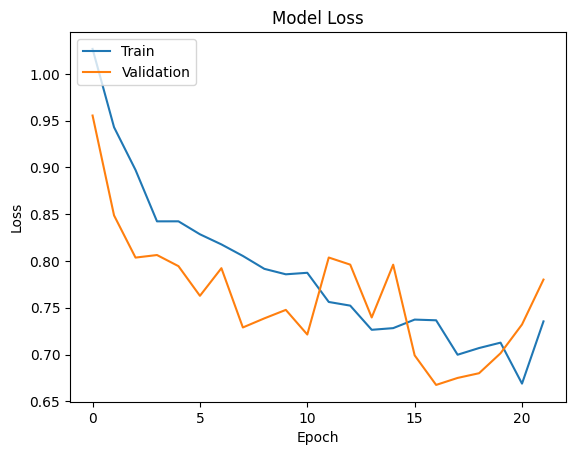

In [4]:
# Define image dimensions and batch size
img_height, img_width = 112, 112
batch_size = 32

# Define data directories
data_dir = "/content/AxialT2_left_l4_5_data_roi_112_clean"
train_dir = os.path.join(data_dir)
val_dir = os.path.join(data_dir)

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Rescale validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class
    subset='training',
    classes=['Normal', 'Moderate', 'Severe'] #Specify all three classes
)

# Create validation data generator
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    classes=['Normal', 'Moderate', 'Severe'] #Specify all three classes
)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Softmax for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Categorical cross-entropy loss
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step


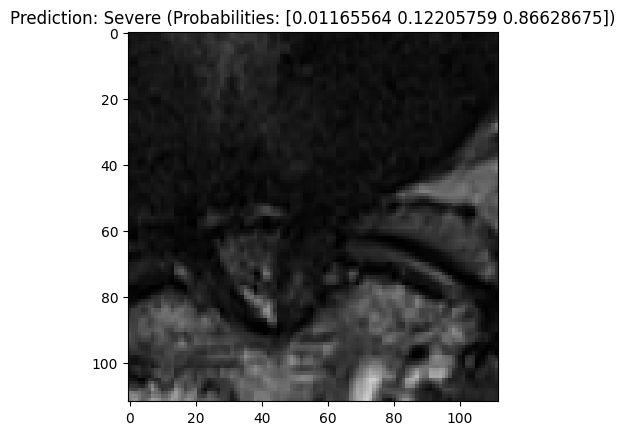

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def preprocess_image_3class(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (img_height, img_width))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_on_image_3class(image_path, model):
    img = preprocess_image_3class(image_path)
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)
    class_labels = ['Normal', 'Moderate', 'Severe'] # Define class labels
    predicted_class = class_labels[predicted_class_index]
    return prediction, predicted_class

# Example usage
image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Severe/1012284084_46.png"  # Example path

# Assuming 'model' is your 3-class CNN model (already trained)
prediction, predicted_class = predict_on_image_3class(image_path, model)

# Display the image and prediction
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Prediction: {predicted_class} (Probabilities: {prediction[0]})")
plt.show()

In [ ]:
# Load your image data and labels for the 3-class SVM
def load_data_3class(data_dir):
    images = []
    labels = []
    for class_name in ['Normal', 'Moderate', 'Severe']:
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.png'):
                img_path = os.path.join(class_dir, filename)
                try:
                    img = Image.open(img_path)
                    img = img.resize((112, 112))
                    img_array = np.array(img).flatten()
                    images.append(img_array)
                    if class_name == 'Normal':
                        labels.append(0)
                    elif class_name == 'Moderate':
                        labels.append(1)
                    else: #Severe
                        labels.append(2)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)

X_3class, y_3class = load_data_3class('/content/AxialT2_left_l4_5_data_roi_112_clean')

# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3class, y_3class, test_size=0.2, random_state=42)

# Initialize and train the 3-class SVM model
svm_model_3class = SVC(kernel='linear', C=1) # You can adjust the kernel and C parameter
svm_model_3class.fit(X_train_3, y_train_3)

# Make predictions on the test set
y_pred_3 = svm_model_3class.predict(X_test_3)

# Evaluate the model
print("Accuracy (3-class SVM):", accuracy_score(y_test_3, y_pred_3))
print(classification_report(y_test_3, y_pred_3))

Accuracy (3-class SVM): 0.652046783625731
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       158
           1       0.48      0.52      0.50       108
           2       0.68      0.59      0.63        76

    accuracy                           0.65       342
   macro avg       0.64      0.63      0.63       342
weighted avg       0.66      0.65      0.65       342



In [ ]:
def predict_svm_single_image_3class(image_path, model, X):
    try:
        img = Image.open(image_path)
        img = img.resize((112, 112))
        img_array = np.array(img).flatten()
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

    img_array = img_array.reshape(1, -1)
    prediction = model.predict(img_array)
    return prediction[0]

# Example usage for 3-class SVM
# image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Moderate/1003643381_34.png"
image_path = "/content/AxialT2_left_l4_5_data_roi_112_clean/Normal/1014921752_16.png"
predicted_class_3 = predict_svm_single_image_3class(image_path, svm_model_3class, X_3class)

if predicted_class_3 is not None:
    print(f"Predicted class for {image_path} (3-class SVM): {predicted_class_3}")

Predicted class for /content/AxialT2_left_l4_5_data_roi_112_clean/Normal/1014921752_16.png (3-class SVM): 0
